In [2]:
import mlflow
import os

mlflow.set_tracking_uri("http://localhost:5000")
os.environ['AWS_ACCESS_KEY_ID'] = 'mlflow'  
os.environ['AWS_SECRET_ACCESS_KEY'] = 'mlflowpass' 

os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:10000'

In [20]:
import sys
sys.path.append("../train")

from unet import UNet

model = mlflow.pytorch.load_model("runs:/1512f15b14e94b579bef157dfbfced49/model")

model.eval()

2025/08/07 01:55:46 WARNING mlflow.pytorch: Stored model version '2.1.0' does not match installed PyTorch version '2.7.1+cu126'


UNet(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [ ]:
import os
from PIL import Image
import torch
import torch.nn.functional as F
from torchvision.transforms.functional import to_tensor


image_dir = "../train-classifier/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
original_image = Image.open(image_dir)
resized_image = original_image.resize((256, 256))
img_tensor = to_tensor(resized_image).unsqueeze(0).to(device)


with torch.no_grad():
    mask = model(img_tensor)
H, W = original_image.size[1], original_image.size[0]  # (H, W)
mask = F.interpolate(mask, size=(H, W), mode='bilinear', align_corners=False)
mask = (mask[0, 0] > 0.5).float()  # [H, W]


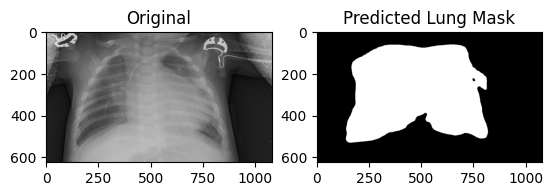

In [50]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Predicted Lung Mask")
plt.imshow(mask.cpu(), cmap='gray')

plt.show()


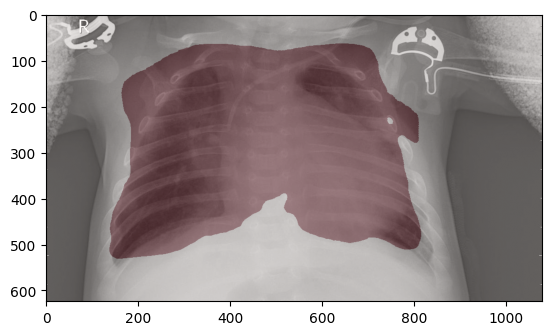

In [51]:
plt.imshow(original_image, cmap='gray')
plt.imshow(mask.cpu(), alpha=0.3, cmap='Reds')  # 붉은색 반투명 마스크
